In [1]:
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.layers as L
import numpy as np
import pandas as pd 

In [6]:
from google.colab import files
uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
/content/gdrive/MyDrive/age_gender.csv

In [ ]:
!unzip 'age_gender.csv.zip'

unzip:  cannot find or open age_gender.csv.zip, age_gender.csv.zip.zip or age_gender.csv.zip.ZIP.


In [3]:
faces_df = pd.read_csv('/content/gdrive/MyDrive/age_gender.csv')

In [4]:
faces_df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [5]:
faces = faces_df[['age', 'ethnicity', 'gender', 'pixels']]


In [6]:
faces

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [7]:
faces['pixels'][0]

'129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 131 132 125 125 115 91 50 141 145 144 138 135 139 139 133 127 123 124 122 1

In [8]:
def splitter(pixel_string):
  "splits a string on the empty spice and converts it to a np array"
  x = pixel_string.split()
  x = np.array(x, dtype='float32')
  x = x / 255 #normalization
  return x



In [9]:
faces['pixels'] = faces['pixels'].apply(splitter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
faces['pixels'][0]

array([0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
       0.57254905], dtype=float32)

In [11]:
faces.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,1,2,0,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,1,2,0,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,1,2,0,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,1,2,0,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."


# EDA

In [12]:
print(faces.shape)

(23705, 4)


In [13]:
faces.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [14]:
faces['gender']

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [16]:

age_distribution = faces['age'].value_counts()
ethnicity_distribution = faces['ethnicity'].value_counts()
gender_distribution = faces['gender'].value_counts().rename(index={0:'man',1:'woman'})


In [15]:
X = faces[['age','gender', 'ethnicity']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



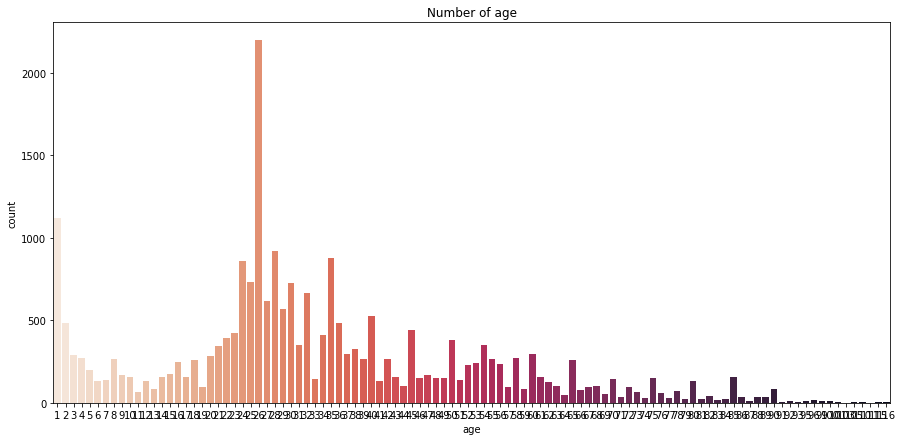

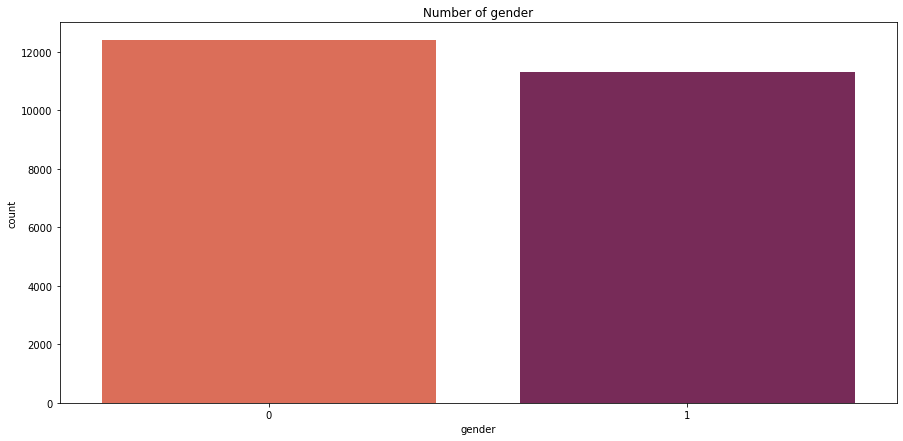

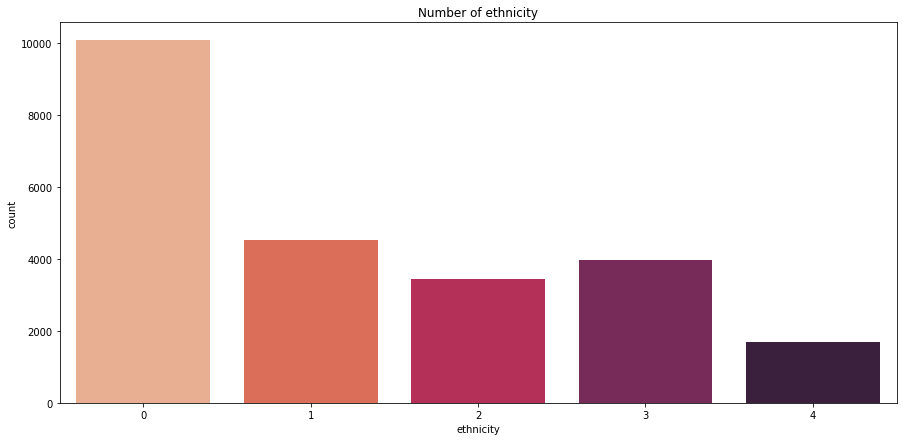

In [17]:
# for i in X.columns :
for i in X.columns :
    plt.figure(figsize=(15,7))
    g = sns.countplot(X[i], palette="rocket_r")
    plt.title("Number of {}".format(i))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Age Distribution')

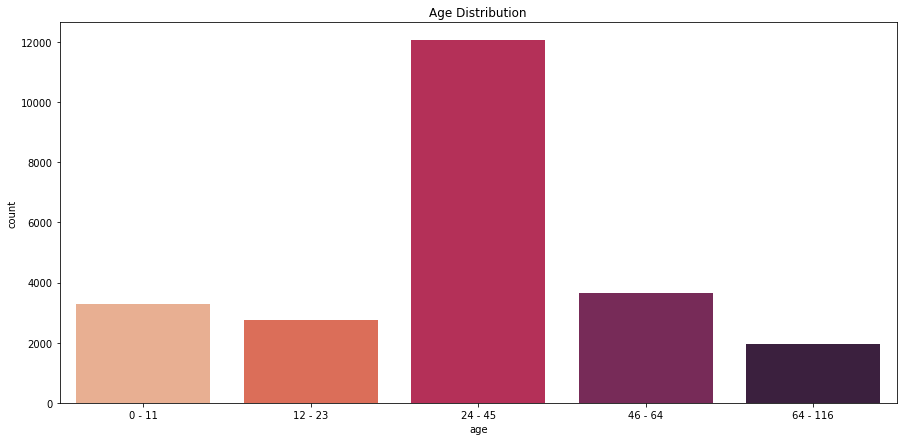

In [18]:
age_slice = pd.cut(faces["age"],bins=[0,11,23,45,64,116],labels=["0 - 11","12 - 23","24 - 45","46 - 64","64 - 116"])
plt.figure(figsize=(15,7))
g = sns.countplot(age_slice, palette="rocket_r")
plt.title("Age Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gender Distribution')

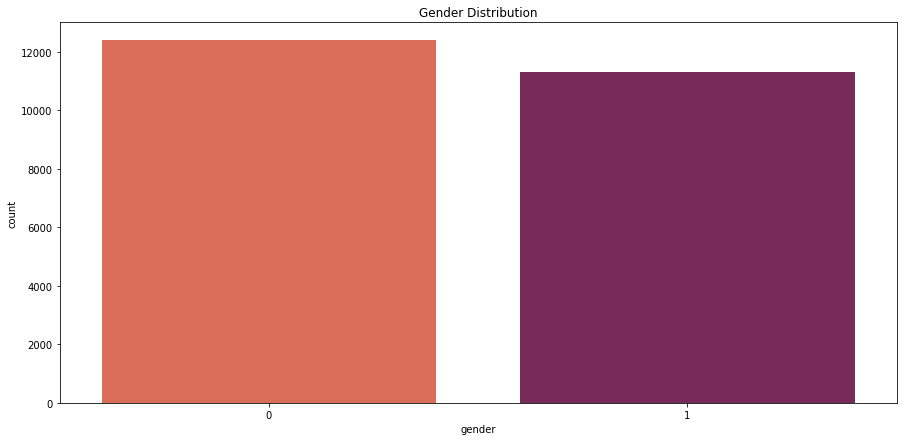

In [19]:
gender_slice = pd.cut(faces["gender"],bins=[-1,0,1],labels=["0","1"])
plt.figure(figsize=(15,7))
g = sns.countplot(gender_slice, palette="rocket_r")
plt.title("Gender Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ethnicity Distribution')

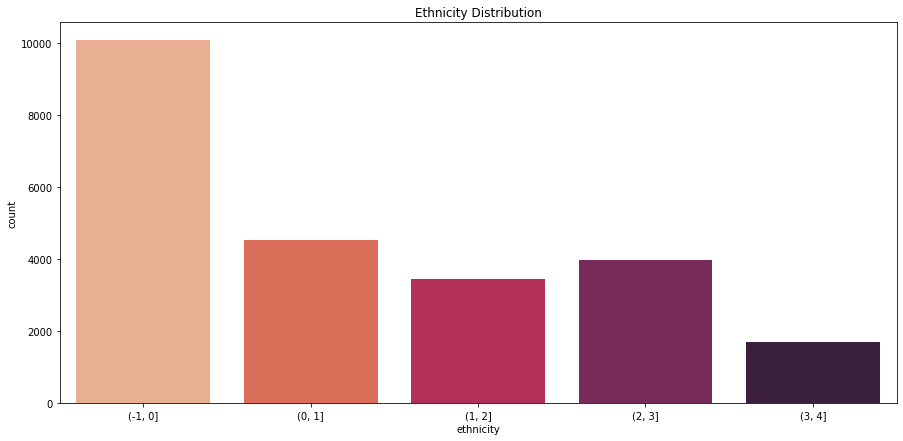

In [20]:
ethnicity_slice = pd.cut(faces['ethnicity'], bins=[-1,0,1,2,3,4])
plt.figure(figsize=(15,7))
g = sns.countplot(ethnicity_slice, palette="rocket_r")
plt.title("Ethnicity Distribution")

In [21]:
X = np.array(faces['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)

In [22]:
y = faces['gender']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.245, random_state=37
)

In [23]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


## Stop training when validation loss reach 0.2700
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [24]:
history = model.fit(
    X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/20
252/252 [==============================] - 57s 224ms/step - loss: 0.5356 - accuracy: 0.7296 - val_loss: 0.6038 - val_accuracy: 0.7983
Epoch 2/20
252/252 [==============================] - 54s 214ms/step - loss: 0.4100 - accuracy: 0.8142 - val_loss: 0.4290 - val_accuracy: 0.8318
Epoch 3/20
252/252 [==============================] - 54s 214ms/step - loss: 0.3640 - accuracy: 0.8348 - val_loss: 0.3478 - val_accuracy: 0.8536
Epoch 4/20
252/252 [==============================] - 54s 213ms/step - loss: 0.3405 - accuracy: 0.8500 - val_loss: 0.3217 - val_accuracy: 0.8581
Epoch 5/20
252/252 [==============================] - 54s 213ms/step - loss: 0.3176 - accuracy: 0.8608 - val_loss: 0.3260 - val_accuracy: 0.8598
Epoch 6/20
252/252 [==============================] - 54s 215ms/step - loss: 0.3047 - accuracy: 0.8664 - val_loss: 0.3535 - val_accuracy: 0.8464
Epoch 7/20
252/252 [==============================] - 55s 218ms/step - loss: 0.2927 - accuracy: 0.8726 - val_loss: 0.3005 - val_ac

In [25]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [26]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2513410151004791
Test Accuracy: 0.8892906308174133


In [27]:
y = faces['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=37
)

In [28]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Stop training when validation accuracy reach 79%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.790):
            print("\nReached 79% val_accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [29]:
history = model.fit(
    X_train, y_train, epochs=16, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/16
267/267 [==============================] - 46s 169ms/step - loss: 1.2410 - accuracy: 0.5283 - val_loss: 0.9885 - val_accuracy: 0.6695
Epoch 2/16
267/267 [==============================] - 45s 170ms/step - loss: 0.9692 - accuracy: 0.6603 - val_loss: 0.8107 - val_accuracy: 0.7317
Epoch 3/16
267/267 [==============================] - 45s 170ms/step - loss: 0.8774 - accuracy: 0.6933 - val_loss: 0.7236 - val_accuracy: 0.7459
Epoch 4/16
267/267 [==============================] - 45s 170ms/step - loss: 0.8201 - accuracy: 0.7164 - val_loss: 0.6987 - val_accuracy: 0.7559
Epoch 5/16
267/267 [==============================] - 46s 171ms/step - loss: 0.7815 - accuracy: 0.7283 - val_loss: 0.7154 - val_accuracy: 0.7543
Epoch 6/16
267/267 [==============================] - 45s 170ms/step - loss: 0.7407 - accuracy: 0.7445 - val_loss: 0.6502 - val_accuracy: 0.7781
Epoch 7/16
267/267 [==============================] - 46s 171ms/step - loss: 0.7052 - accuracy: 0.7588 - val_loss: 0.6307 - val_ac

In [30]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [31]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.6074947714805603
Test Accuracy: 0.794979989528656


In [32]:
y = faces['age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.222, random_state=42
)

In [33]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


## Stop training when validation loss reach 110
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)        

In [34]:
history = model.fit(
    X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/20
260/260 [==============================] - 67s 257ms/step - loss: 358.7635 - mae: 14.3938 - val_loss: 1095.8109 - val_mae: 27.5376
Epoch 2/20
260/260 [==============================] - 67s 257ms/step - loss: 219.6761 - mae: 11.1501 - val_loss: 762.3331 - val_mae: 22.6468
Epoch 3/20
260/260 [==============================] - 67s 256ms/step - loss: 174.8402 - mae: 9.8712 - val_loss: 227.9105 - val_mae: 11.2904
Epoch 4/20
260/260 [==============================] - 66s 256ms/step - loss: 162.7282 - mae: 9.5418 - val_loss: 163.4573 - val_mae: 9.2944
Epoch 5/20
260/260 [==============================] - 67s 256ms/step - loss: 151.1814 - mae: 9.0904 - val_loss: 105.5700 - val_mae: 7.6316

Reached 110 val_loss so cancelling training!


In [35]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [36]:

mse, mae = model.evaluate(X_test,y_test,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 106.93695068359375
Test Mean absolute error: 7.7557268142700195
